In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from google.colab import drive

!pip install --upgrade scikit-learn==1.4.1
import sklearn

print(sklearn.__version__)

drive.mount('/content/drive')

print("importing is done")

1.4.1.post1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
importing is done


In [3]:
!pip install scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!gdown 1-AUZALngF01d5ywqumnR_g8aF52xlw8o

Downloading...
From: https://drive.google.com/uc?id=1-AUZALngF01d5ywqumnR_g8aF52xlw8o
To: /content/Personal_Gym_Recommendation.xlsx
100% 847k/847k [00:00<00:00, 47.9MB/s]


In [ ]:
path = "/content/Personal_Gym_Recommendation.xlsx"
df = pd.read_excel(path)
df.sample(10, random_state=11)

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Lower Limmit,Upper Limmit,Standard Weight,Fat Percentage,Fitness Goal,Fitness Type,Exercises,Equipment Required,Diet,Conclusion Recommendation
5418,Male,35,1.82,74.0,Yes,No,22.34,Normal,61.28,82.48,61.28 (kg) - 82.48(kg),18.66,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Garlic, mushroon, green papper an...",Follow a regular exercise schedule. Adhere to ...
3399,Female,18,1.64,41.0,No,Yes,15.24,Underweight,49.76,66.97,49.76 (kg) - 66.97(kg),17.03,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
2248,Female,19,1.68,47.5,Yes,Yes,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),19.17,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
7160,Female,26,1.81,88.6,Yes,Yes,27.04,Overweight,60.61,81.57,60.61 (kg) - 81.57(kg),33.03,Weight Loss,Cardio Fitness,"brisk walking, cycling, swimming, or dancing.","Kettlebell, Dumbbells, Yoga Mat, Treadmill","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
2888,Female,47,1.68,47.5,Yes,Yes,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),25.61,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
7475,Male,36,1.63,76.3,No,Yes,28.72,Overweight,49.15,66.16,49.15 (kg) - 66.16(kg),26.54,Weight Loss,Cardio Fitness,"Walking, Yoga, Swimming.","Kettlebell, Dumbbells, Yoga Mat","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
1048,Male,50,1.77,96.0,No,No,30.64,Obuse,57.96,78.01,57.96 (kg) - 78.01(kg),32.07,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, Rowing ...","Vegetables: (Broccoli, Carrots, Spinach, Lettu...",Follow a regular exercise schedule. Adhere to ...
9012,Female,38,1.75,83.0,No,No,27.10,Overweight,56.66,76.26,56.66 (kg) - 76.26(kg),35.86,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, Rowing ...","Vegetables: (Broccoli, Carrots, Spinach, Lettu...",Follow a regular exercise schedule. Adhere to ...
4481,Male,52,1.66,49.0,No,No,17.78,Underweight,50.98,68.61,50.98 (kg) - 68.61(kg),17.10,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
9303,Female,47,1.84,93.0,Yes,Yes,27.47,Overweight,62.63,84.30,62.63 (kg) - 84.30(kg),38.37,Weight Loss,Cardio Fitness,"brisk walking, cycling, swimming, or dancing.","Kettlebell, Dumbbells, Yoga Mat, Treadmill","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...


In [ ]:
df.describe()

,Age,Height,Weight,BMI,Lower Limmit,Upper Limmit,Fat Percentage
count,13503.000000,13503.000000,13503.000000,13503.000000,13503.000000,13503.000000,13503.000000
mean,39.967785,1.696374,69.654588,24.237591,53.413190,71.891737,27.477413
std,13.268528,0.097600,20.286801,6.943227,6.136569,8.258702,10.359872
min,18.000000,1.300000,32.000000,9.520000,31.270000,42.080000,0.740000
25%,28.000000,1.630000,54.000000,18.510000,49.150000,66.160000,19.950000
50%,40.000000,1.680000,68.000000,24.890000,52.210000,70.280000,27.290000
75%,52.000000,1.770000,85.000000,29.870000,57.960000,78.010000,34.620000
max,63.000000,1.930000,130.000000,57.990000,68.910000,92.750000,73.620000


In [ ]:
df.shape

(13503, 18)

In [ ]:
df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes', 'BMI',
       'Level', 'Lower Limmit', 'Upper Limmit', 'Standard Weight',
       'Fat Percentage', 'Fitness Goal', 'Fitness Type', 'Exercises',
       'Equipment Required', 'Diet', 'Conclusion Recommendation'],
      dtype='object')

In [ ]:
df.isnull().sum()

Sex                          0
Age                          0
Height                       0
Weight                       0
Hypertension                 0
Diabetes                     0
BMI                          0
Level                        0
Lower Limmit                 0
Upper Limmit                 0
Standard Weight              0
Fat Percentage               0
Fitness Goal                 0
Fitness Type                 0
Exercises                    0
Equipment Required           0
Diet                         0
Conclusion Recommendation    0
dtype: int64

In [ ]:
df.dtypes

Sex                           object
Age                            int64
Height                       float64
Weight                       float64
Hypertension                  object
Diabetes                      object
BMI                          float64
Level                         object
Lower Limmit                 float64
Upper Limmit                 float64
Standard Weight               object
Fat Percentage               float64
Fitness Goal                  object
Fitness Type                  object
Exercises                     object
Equipment Required            object
Diet                          object
Conclusion Recommendation     object
dtype: object

In [ ]:
df.nunique()

Sex                             2
Age                            46
Height                         48
Weight                        216
Hypertension                    2
Diabetes                        2
BMI                           940
Level                           4
Lower Limmit                   48
Upper Limmit                   48
Standard Weight                48
Fat Percentage               2201
Fitness Goal                    2
Fitness Type                    2
Exercises                       5
Equipment Required              8
Diet                           11
Conclusion Recommendation       9
dtype: int64

In [ ]:
df.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Lower Limmit,Upper Limmit,Standard Weight,Fat Percentage,Fitness Goal,Fitness Type,Exercises,Equipment Required,Diet,Conclusion Recommendation
0,Male,18,1.68,47.5,No,No,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),8.14,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,Male,18,1.68,47.5,Yes,No,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),8.14,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,Male,18,1.68,47.5,No,Yes,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),8.14,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),8.14,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,Female,18,1.68,47.5,No,No,16.83,Underweight,52.21,70.28,52.21 (kg) - 70.28(kg),18.94,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
df.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Lower Limmit,Upper Limmit,Standard Weight,Fat Percentage,Fitness Goal,Fitness Type,Exercises,Equipment Required,Diet,Conclusion Recommendation
9983,Female,22,1.66,87.0,Yes,Yes,31.57,Obuse,50.98,68.61,50.98 (kg) - 68.61(kg),37.54,Weight Loss,Cardio Fitness,"brisk walking, cycling, swimming, or dancing.","Kettlebell, Dumbbells, Yoga Mat, Treadmill","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
8852,Female,33,1.69,73.0,No,No,25.56,Overweight,52.84,71.12,52.84 (kg) - 71.12(kg),32.86,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, Rowing ...","Vegetables: (Broccoli, Carrots, Spinach, Lettu...",Follow a regular exercise schedule. Adhere to ...
10298,Male,32,1.76,100.0,No,Yes,32.28,Obuse,57.31,77.13,57.31 (kg) - 77.13(kg),29.90,Weight Loss,Cardio Fitness,"Walking, Yoga, Swimming.","Kettlebell, Dumbbells, Yoga Mat","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
9113,Male,41,1.76,107.0,Yes,No,34.54,Obuse,57.31,77.13,57.31 (kg) - 77.13(kg),34.68,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, Rowing ...","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
5147,Male,26,1.73,93.0,No,Yes,31.07,Obuse,55.37,74.52,55.37 (kg) - 74.52(kg),27.06,Weight Loss,Cardio Fitness,"Walking, Yoga, Swimming.","Kettlebell, Dumbbells, Yoga Mat","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...


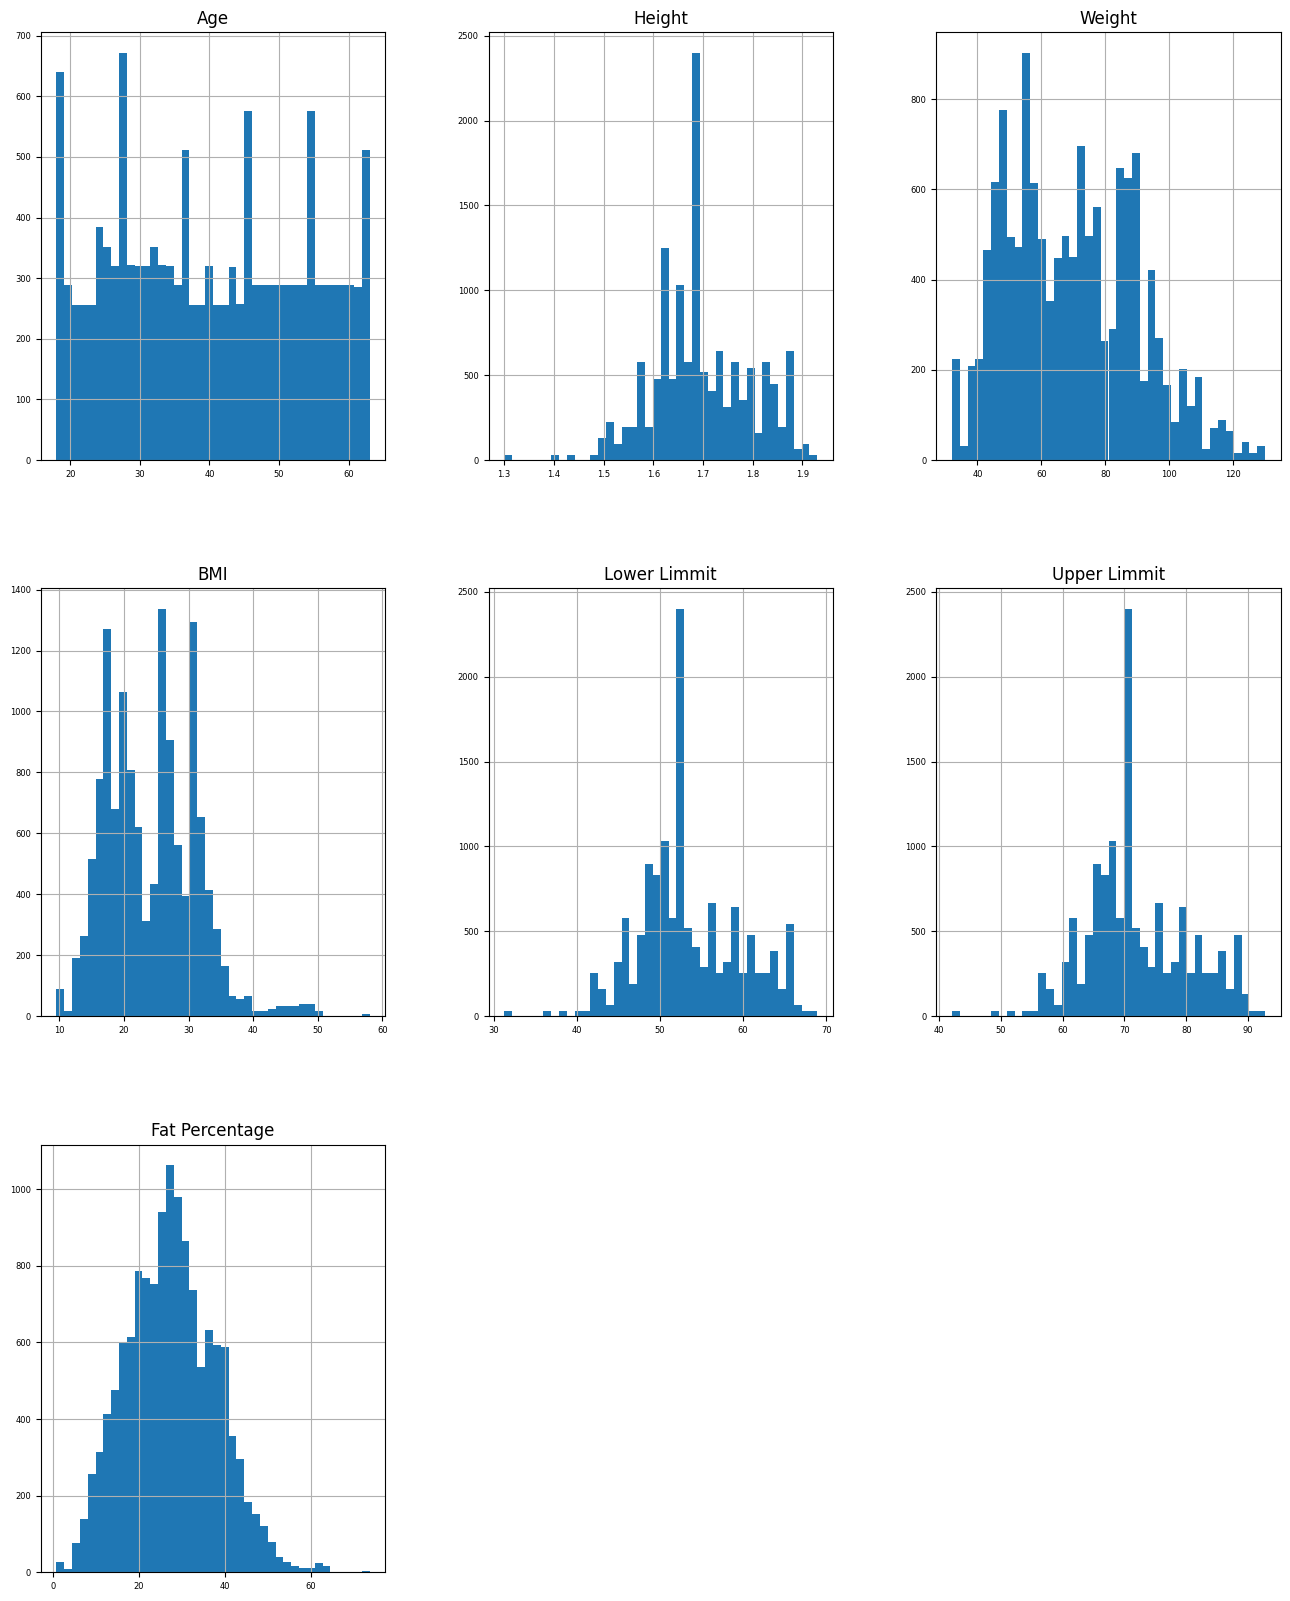

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

In [ ]:
# Persiapan bikin correlation matrix
#category
cat_cols = ['Sex','Hypertension','Diabetes','Level','Fitness Goal',"Standard Weight",'Fitness Type',"Exercises","Equipment Required", "Diet","Conclusion Recommendation"]

#continious
con_cols = ["Age","Height","Weight","BMI","Lower Limmit","Upper Limmit", "Fat Percentage"]
target_col = ["Exercises","Equipment Required", "Diet","Conclusion Recommendation"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['Sex', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Standard Weight', 'Fitness Type', 'Exercises', 'Equipment Required', 'Diet', 'Conclusion Recommendation']
The continuous cols are :  ['Age', 'Height', 'Weight', 'BMI', 'Lower Limmit', 'Upper Limmit', 'Fat Percentage']
The target variable is :   ['Exercises', 'Equipment Required', 'Diet', 'Conclusion Recommendation']


In [ ]:
df_corr = df[con_cols].corr().transpose()

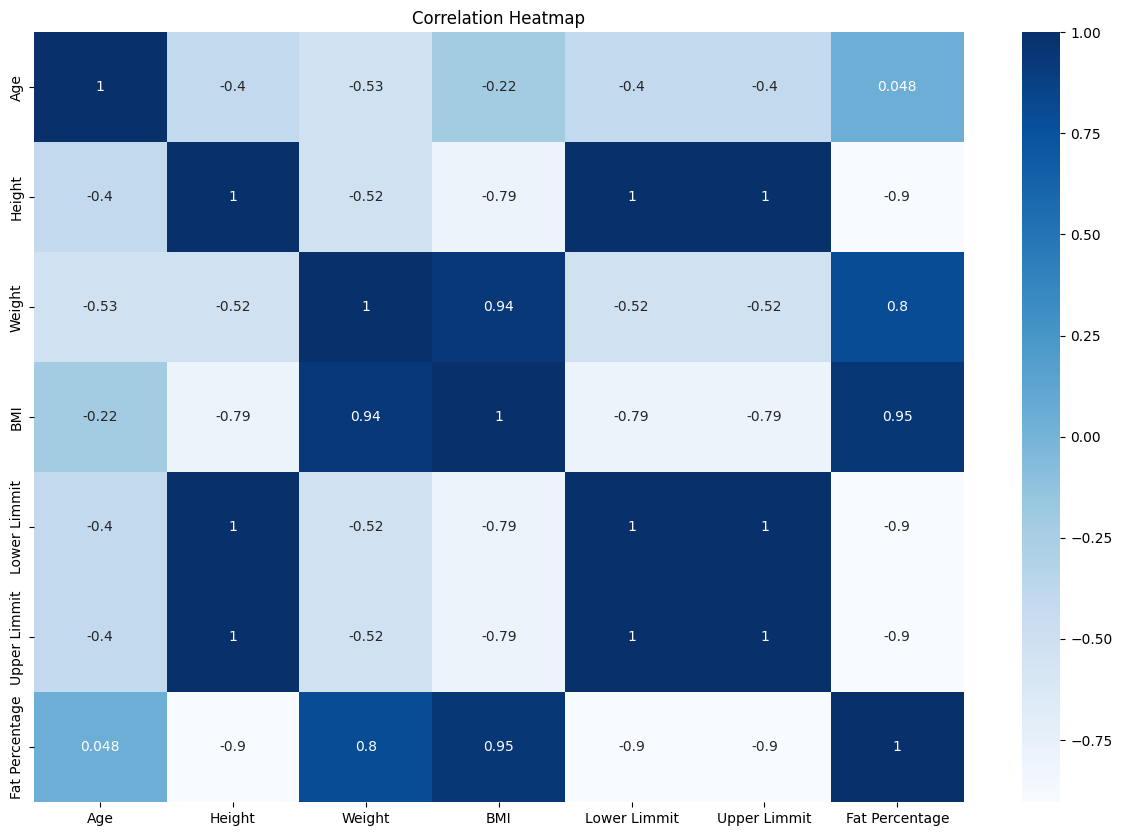

In [ ]:
correlation_matrix = df_corr.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.shape

(13503, 18)

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Print total masing-masing data kategori
for col in cat_cols:
    print(df[col].value_counts())
    print()

Sex
Male      6752
Female    6751
Name: count, dtype: int64

Hypertension
No     6752
Yes    6751
Name: count, dtype: int64

Diabetes
No     6752
Yes    6751
Name: count, dtype: int64

Level
Normal         3385
Overweight     3383
Obuse          3368
Underweight    3367
Name: count, dtype: int64

Fitness Goal
Weight Gain    6752
Weight Loss    6751
Name: count, dtype: int64

Standard Weight
52.21 (kg) - 70.28(kg)    2018
48.55 (kg) - 65.35(kg)     896
51.59 (kg) - 69.44(kg)     576
53.47 (kg) - 71.96(kg)     519
50.98 (kg) - 68.61(kg)     518
50.37 (kg) - 67.79(kg)     512
49.76 (kg) - 66.97(kg)     480
65.39 (kg) - 88.01(kg)     480
52.84 (kg) - 71.12(kg)     382
49.15 (kg) - 66.16(kg)     352
56.01 (kg) - 75.39(kg)     352
58.62 (kg) - 78.89(kg)     352
54.73 (kg) - 73.66(kg)     345
57.96 (kg) - 78.01(kg)     320
61.28 (kg) - 82.48(kg)     320
56.66 (kg) - 76.26(kg)     312
59.28 (kg) - 79.78(kg)     289
45.60 (kg) - 61.38(kg)     288
47.95 (kg) - 64.54(kg)     288
55.37 (kg) - 74.5

In [ ]:
df_clean = df[
(df['Equipment Required'] != 'Equipment Required')
& (df['Diet'] != 'Diet')
& (df['Conclusion Recommendation'] != 'Conclusion Recommendation')
]

# Print total masing-masing data kategori
for col in cat_cols:
    print(df_clean[col].value_counts())
    print()


Sex
Female    6739
Male      6728
Name: count, dtype: int64

Hypertension
No     6734
Yes    6733
Name: count, dtype: int64

Diabetes
No     6734
Yes    6733
Name: count, dtype: int64

Level
Overweight     3383
Normal         3373
Obuse          3368
Underweight    3343
Name: count, dtype: int64

Fitness Goal
Weight Loss    6751
Weight Gain    6716
Name: count, dtype: int64

Standard Weight
52.21 (kg) - 70.28(kg)    1999
48.55 (kg) - 65.35(kg)     896
51.59 (kg) - 69.44(kg)     576
53.47 (kg) - 71.96(kg)     519
50.98 (kg) - 68.61(kg)     518
50.37 (kg) - 67.79(kg)     512
49.76 (kg) - 66.97(kg)     480
65.39 (kg) - 88.01(kg)     476
52.84 (kg) - 71.12(kg)     380
49.15 (kg) - 66.16(kg)     352
56.01 (kg) - 75.39(kg)     350
58.62 (kg) - 78.89(kg)     350
54.73 (kg) - 73.66(kg)     343
57.96 (kg) - 78.01(kg)     320
61.28 (kg) - 82.48(kg)     320
56.66 (kg) - 76.26(kg)     309
45.60 (kg) - 61.38(kg)     288
47.95 (kg) - 64.54(kg)     288
55.37 (kg) - 74.52(kg)     288
46.18 (kg) - 62.1

In [ ]:
df_copy = df_clean.copy()  # Create a copy of the original DataFrame

# Drop multiple columns yang tidak terpakai
columns_to_drop = ['BMI', 'Level', 'Lower Limmit', 'Upper Limmit', 'Standard Weight','Fat Percentage']
df_copy.drop(columns_to_drop, axis=1, inplace=True)
df_copy.head()



,Sex,Age,Height,Weight,Hypertension,Diabetes,Fitness Goal,Fitness Type,Exercises,Equipment Required,Diet,Conclusion Recommendation
9983,Female,22,1.66,87.0,Yes,Yes,Weight Loss,Cardio Fitness,"brisk walking, cycling, swimming, or dancing.","Kettlebell, Dumbbells, Yoga Mat, Treadmill","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
8852,Female,33,1.69,73.0,No,No,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, Rowing ...","Vegetables: (Broccoli, Carrots, Spinach, Lettu...",Follow a regular exercise schedule. Adhere to ...
10298,Male,32,1.76,100.0,No,Yes,Weight Loss,Cardio Fitness,"Walking, Yoga, Swimming.","Kettlebell, Dumbbells, Yoga Mat","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
9113,Male,41,1.76,107.0,Yes,No,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, Rowing ...","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
5147,Male,26,1.73,93.0,No,Yes,Weight Loss,Cardio Fitness,"Walking, Yoga, Swimming.","Kettlebell, Dumbbells, Yoga Mat","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...


In [ ]:
# Ubah kategori menjadi data ordinal number
df_copy['Sex'] = df_copy['Sex'].replace({'Male': 1, 'Female': 0})
df_copy['Hypertension'] = df_copy['Hypertension'].replace({'Yes': 1, 'No': 0})
df_copy['Diabetes'] = df_copy['Diabetes'].replace({'Yes': 1, 'No': 0})
df_copy['Fitness Goal'] = df_copy['Fitness Goal'].replace({'Weight Gain': 1, 'Weight Loss': 0})
df_copy.sample(10, random_state=11)

,Sex,Age,Height,Weight,Hypertension,Diabetes,Fitness Goal,Fitness Type,Exercises,Equipment Required,Diet,Conclusion Recommendation
12444,0,31,1.62,120.0,1,0,0,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, Rowing ...","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
11566,0,43,1.81,66.0,0,1,1,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, mushroon, green papper);P...",Follow a regular exercise schedule. Adhere to ...
10992,1,54,1.60,67.5,0,0,0,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, Rowing ...","Vegetables: (Broccoli, Carrots, Spinach, Lettu...",Follow a regular exercise schedule. Adhere to ...
11952,1,55,1.74,82.0,0,0,0,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, mushroon, green papper);P...",Follow a regular exercise schedule. Adhere to ...
11836,0,51,1.68,88.0,0,0,0,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Kettlebell, Dumbbells, Yoga Mat","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
12039,0,58,1.78,51.0,1,1,1,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Kettlebell, Dumbbells, Yoga Mat, Treadmill","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
10588,0,41,1.86,111.0,0,0,0,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, Rowing ...","Vegetables: (Broccoli, Carrots, Spinach, Lettu...",Follow a regular exercise schedule. Adhere to ...
2424,0,24,1.68,72.0,1,1,0,Cardio Fitness,"brisk walking, cycling, swimming, or dancing.","Kettlebell, Dumbbells, Yoga Mat, Treadmill","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
6904,0,31,1.84,89.0,1,1,0,Cardio Fitness,"brisk walking, cycling, swimming, or dancing.","Kettlebell, Dumbbells, Yoga Mat, Treadmill","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...
1563,1,25,1.69,95.0,1,1,0,Cardio Fitness,"brisk walking, cycling, swimming, or dancing.","Kettlebell, Dumbbells, Yoga Mat, Treadmill","Vegetables: (Garlic, Mushroom, Green Papper, I...",Follow a regular exercise schedule. Adhere to ...


In [ ]:
# Pisahkan data training dan testing

X = df_copy.drop(['Conclusion Recommendation','Diet','Fitness Type','Equipment Required','Exercises'], axis=1)
y = df_copy['Diet']
print(y.unique());
class_names = y.unique()

# Training data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
# , stratify=y

# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=50)

# fit the model to the training set
rfc_100.fit(X_train, y_train)
from joblib import dump
import joblib

# Save the model
joblib.dump(rfc_100, 'model_diet_plan_recommendation.pkl')

# Predict on the test set results

y_pred = rfc_100.predict(X_test)
# print(y_pred)

# Akurasi untuk satu variable output
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_testing = rfc_100.predict([[1,21, 1.9,130, 0,  0,1]])
print(y_pred_testing)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Class Names:", class_names)

# Print confusion matrix
print("Confusion Matrix:")
for i in range(len(class_names)):
    print("\t" + class_names[i], "\t", conf_matrix[i])


report = classification_report(y_test, y_pred)
print(report)

['Vegetables: (Garlic, Mushroom, Green Papper, Icebetg Lettuce); Protein Intake: (Baru Nuts, Beech Nuts, Hemp Seeds, Cheese Spandwich); Juice: (Apple Juice, Mango juice,and Beetroot juice)'
 'Vegetables: (Broccoli, Carrots, Spinach, Lettuce, Onion); Protein Intake: (Cheese, Cattoge cheese, Skim Milk, Law fat Milk, and Baru Nuts); Juice: (Fruit Juice, Aloe vera juice, Cold-pressed juice, and Watermelon juice)'
 'Vegetables: (Garlic, mushroon, green papper);Protein Intake: ( Baru Nuts, Beech Nuts, and Hemp Seeds); Juice : (Apple juice, Mango, and Beetroot Juice)'
 'Vegetables: (Mixed greens, cherry tomatoes, cucumbers, bell peppers, carrots, celery, bell peppers);Protein Intake: (Chicken, fish, tofu, or legumes); Juice : (Green juice,kale, spinach, cucumber, celery, and apple)'
 'Vegetables: (Tomatoes, Garlic, leafy greens, broccoli, carrots, and bell peppers); Protein Intake: (poultry, fish, tofu, legumes, and low-fat dairy products); Juice: (Apple juice, beetroot juice and mango juice)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


                                                                                                                                                                                                                                                              precision    recall  f1-score   support

                                 Vegetables: (Broccoli, Carrots, Spinach, Lettuce, Onion); Protein Intake: (Cheese, Cattoge cheese, Skim Milk, Law fat Milk, and Baru Nuts); Juice: (Fruit Juice, Aloe vera juice, Cold-pressed juice, and Watermelon juice)       0.97      0.95      0.96       329
                                        Vegetables: (Carrots, Sweet Potato, Lettuce); Protein Intake: (Red meats, poultry, fish, eggs, dairy products, legumes, and nuts); Juice: (Fruit juice, watermelon juice, carrot juice, apple juice and mango juice)       0.94      0.95      0.94        76
                                    Vegetables: (Carrots, Sweet Potato, and Lettuce); Protein Intake: (Red meats, pou

In [ ]:
# Pisahkan data training dan testing

X = df_copy.drop(['Conclusion Recommendation','Diet','Fitness Type','Equipment Required','Exercises'], axis=1)
y = df_copy['Conclusion Recommendation']
print(y.unique());
class_names = y.unique()

# Training data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1000)
# , stratify=y

# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)
from joblib import dump
import joblib

# Save the model
joblib.dump(rfc_100, 'model_conclusion_recommendation.pkl')

# Predict on the test set results

y_pred = rfc_100.predict(X_test)
# print(y_pred)

# Akurasi untuk satu variable output
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_testing = rfc_100.predict([[1,21, 1.9,130, 0,  0,1]])
print(y_pred_testing)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Class Names:", class_names)

# Print confusion matrix
print("Confusion Matrix:")
for i in range(len(class_names)):
    print("\t" + class_names[i], "\t", conf_matrix[i])


report = classification_report(y_test, y_pred)
print(report)

["Follow a regular exercise schedule. Adhere to the exercise and diet plan to get better results. I'm not a doctor, but I give you general advice on weight gain exercises and diet plans. It is important for individuals with diabetes and high blood pressure to consult with a health care professional, such as a registered dietitian or health care provider, to find an individualized plan that meets their unique needs. also, stop everything that can increase diabetes and blood pressure whether you are doing fitness or not. measure your sugar (diabetes) and blood before starting fitness. Here are some important tips:- Stay hydrated by drinking enough water throughout the day. Monitor your progress and adjust your diet and exercise routine accordingly. Get adequate sleep to support muscle recovery and overall health. Always monitor your situation, and consult your doctor or a professional counselor. Always consult with your healthcare provider before starting any new diet or exercise program

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Pisahkan data training dan testing

X = df_copy.drop(['Conclusion Recommendation','Diet','Fitness Type','Equipment Required','Exercises'], axis=1)
y = df_copy['Fitness Type']
print(y.unique());
class_names = y.unique()

# Training data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1000)
# , stratify=y

# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)
from joblib import dump
import joblib

# Save the model
joblib.dump(rfc_100, 'model_fitness_type_recommendation.pkl')

# Predict on the test set results

y_pred = rfc_100.predict(X_test)
# print(y_pred)

# Akurasi untuk satu variable output
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_testing = rfc_100.predict([[1,21, 1.9,130, 0,  0,1]])
print(y_pred_testing)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Class Names:", class_names)

# Print confusion matrix
print("Confusion Matrix:")
for i in range(len(class_names)):
    print("\t" + class_names[i], "\t", conf_matrix[i])


report = classification_report(y_test, y_pred)
print(report)

['Cardio Fitness' 'Muscular Fitness']
Model accuracy score with 100 decision-trees : 1.0000
['Muscular Fitness']
[[1341    0]
 [   0 1353]]
Class Names: ['Cardio Fitness' 'Muscular Fitness']
Confusion Matrix:
	Cardio Fitness 	 [1341    0]
	Muscular Fitness 	 [   0 1353]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


                  precision    recall  f1-score   support

  Cardio Fitness       1.00      1.00      1.00      1341
Muscular Fitness       1.00      1.00      1.00      1353

        accuracy                           1.00      2694
       macro avg       1.00      1.00      1.00      2694
    weighted avg       1.00      1.00      1.00      2694



In [ ]:
# Pisahkan data training dan testing

X = df_copy.drop(['Conclusion Recommendation','Diet','Fitness Type','Equipment Required','Exercises'], axis=1)
y = df_copy['Equipment Required']
print(y.unique());
class_names = y.unique()

# Training data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1000)
# , stratify=y

# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)
from joblib import dump
import joblib

# Save the model
joblib.dump(rfc_100, 'model_equipments_recommendation.pkl')

# Predict on the test set results

y_pred = rfc_100.predict(X_test)
# print(y_pred)

# Akurasi untuk satu variable output
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_testing = rfc_100.predict([[1,21, 1.9,130, 0,  0,1]])
print(y_pred_testing)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Class Names:", class_names)

# Print confusion matrix
print("Confusion Matrix:")
for i in range(len(class_names)):
    print("\t" + class_names[i], "\t", conf_matrix[i])


report = classification_report(y_test, y_pred)
print(report)

['Kettlebell, Dumbbells, Yoga Mat, Treadmill'
 'Ellipticals, Indoor Rowers,Treadmills, Rowing machine'
 'Kettlebell, Dumbbells, Yoga Mat'
 'Dumbbells, barbells and Blood glucose monitor' 'Dumbbells and barbells'
 'Light athletic shoes, resistance bands, and light dumbbells.'
 'Light athletic shoes, resistance bands, light dumbbells and a Blood glucose monitor.']
Model accuracy score with 100 decision-trees : 0.9584
['Dumbbells and barbells']
[[318   1   2   1   0   7   2]
 [  2 328   3   3   3   5   9]
 [  3   0 652   4   2   0   4]
 [  2   3   4 315   9   2   1]
 [  0   1   5   2 323   0   1]
 [  4   8   4   1   0 313   1]
 [  7   3   0   0   2   1 333]]
Class Names: ['Kettlebell, Dumbbells, Yoga Mat, Treadmill'
 'Ellipticals, Indoor Rowers,Treadmills, Rowing machine'
 'Kettlebell, Dumbbells, Yoga Mat'
 'Dumbbells, barbells and Blood glucose monitor' 'Dumbbells and barbells'
 'Light athletic shoes, resistance bands, and light dumbbells.'
 'Light athletic shoes, resistance bands, light

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


                                                                                      precision    recall  f1-score   support

                                                              Dumbbells and barbells       0.95      0.96      0.95       331
                                       Dumbbells, barbells and Blood glucose monitor       0.95      0.93      0.94       353
                               Ellipticals, Indoor Rowers,Treadmills, Rowing machine       0.97      0.98      0.98       665
                                                     Kettlebell, Dumbbells, Yoga Mat       0.97      0.94      0.95       336
                                          Kettlebell, Dumbbells, Yoga Mat, Treadmill       0.95      0.97      0.96       332
                        Light athletic shoes, resistance bands, and light dumbbells.       0.95      0.95      0.95       331
Light athletic shoes, resistance bands, light dumbbells and a Blood glucose monitor.       0.95      0.96      0.96  

In [ ]:
# Pisahkan data training dan testing
X = df_copy.drop(['Conclusion Recommendation','Diet','Fitness Type','Equipment Required','Exercises'], axis=1)
y = df_copy['Exercises']

# Training data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# , stratify=y

# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)
from joblib import dump
import joblib

# Save the model
joblib.dump(rfc_100, 'model_exercises_recommendation.pkl')

# Predict on the test set results

y_pred_multi = rfc_100.predict(X_test)
# print(y_pred_100)

# Akurasi untuk satu variable output
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_multi)))

y_pred_100 = rfc_100.predict([[1,21, 1.9,130, 0,  0,1]])
print(y_pred_100)

Model accuracy score with 100 decision-trees : 0.9981
['Squats, deadlifts, bench presses, and overhead presses']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Cek dimensi data training dan testing
X_train.shape, X_test.shape

((10773, 7), (2694, 7))

In [ ]:
X_train.dtypes

Sex               int64
Age               int64
Height          float64
Weight          float64
Hypertension      int64
Diabetes          int64
Fitness Goal      int64
dtype: object

In [ ]:
X_train.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,Fitness Goal
12821,0,42,1.62,77.55,0,1,0
2409,1,24,1.68,55.00,0,0,1
699,1,39,1.66,83.00,1,1,0
12373,0,29,1.62,75.50,0,1,0
4276,1,45,1.65,70.00,1,1,0


In [ ]:
X_test.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,Fitness Goal
1777,1,32,1.72,77.0,0,0,0
11040,1,56,1.62,45.5,0,0,1
141,0,22,1.67,58.0,1,0,1
6603,1,23,1.63,55.0,0,1,1
12297,1,27,1.62,56.7,0,1,1


In [43]:
d1 = df_copy
d1 = df_copy.head(1)
d2 = df_copy.sample(n=1, random_state=42)
d2 = d2.head(1)

In [36]:
#Skip

# Pisahkan data training dan testing
X = df_copy.drop(['Conclusion Recommendation','Diet','Fitness Type','Equipment Required','Exercises'], axis=1)
y = df_copy[['Conclusion Recommendation','Diet','Fitness Type','Equipment Required','Exercises']]

# Training data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)


# fit the model
rfc.fit(X_train, y_train)
print(X_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)
print(y_pred)

# Akurasi multi output
accuracies = []
for i, column in enumerate(y_test.columns):
    acc = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    accuracies.append(acc)
    print(f'Accuracy score for target variable "{column}": {acc:.4f}')

# Calculate average accuracy across all target variables
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average accuracy across all target variables: {average_accuracy:.4f}')

# Classification Report
print("Classification Report:")
for i, column in enumerate(y_test.columns):
    report = classification_report(y_test.iloc[:, i],  y_pred[:, i])
    print(report)

print("Agustinus")
y_pred = rfc.predict(X_test)
print(y_pred)

       Sex  Age  Height  Weight  Hypertension  Diabetes  Fitness Goal
12821    0   42    1.62   77.55             0         1             0
2409     1   24    1.68   55.00             0         0             1
699      1   39    1.66   83.00             1         1             0
12373    0   29    1.62   75.50             0         1             0
4276     1   45    1.65   70.00             1         1             0
...    ...  ...     ...     ...           ...       ...           ...
1640     0   28    1.55   42.00             1         1             1
4304     0   46    1.66   57.00             1         1             1
6896     0   31    1.84   63.00             1         1             1
10011    1   23    1.67   84.50             1         1             0
5559     0   39    1.66   76.00             0         1             0

[10773 rows x 7 columns]
[["Follow a regular exercise schedule. Adhere to the exercise and diet plan to get better results. It is important to approach weight 

In [101]:
import json
d1 = df_clean.copy()
d1 = d1.head(1)
d2 = df_clean.sample(n=1, random_state=42)
d2 = d2.head(1)
X1 = d1.drop(['Conclusion Recommendation','Diet','Fitness Type','Equipment Required','Exercises'], axis=1)
print(X1)
y1 = d2[['Conclusion Recommendation','Diet','Fitness Type','Equipment Required','Exercises']]
res=rfc.predict(X_test)
dr = pd.DataFrame(res,columns=['Desk1', 'Rekomendasi_Makanan', 'Rekomendasi_Jenis_Olahraga', 'Peralatan','Rekomendasi_Kegiatan_2'])
dr = dr.head(1)
# print(dr)
dr

         Sex  Age  Height  Weight Hypertension Diabetes    BMI  Level  \
9983  Female   22    1.66    87.0          Yes      Yes  31.57  Obuse   

      Lower Limmit  Upper Limmit         Standard Weight  Fat Percentage  \
9983         50.98         68.61  50.98 (kg) - 68.61(kg)           37.54   

     Fitness Goal  
9983  Weight Loss  


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BMI
- Fat Percentage
- Level
- Lower Limmit
- Standard Weight
- ...


In [100]:
# from sklearn.externals import joblib

# Simpan model ke dalam file .pkl
joblib.dump(rfc, 'RRC.pkl')

['RRC.pkl']

In [108]:
print(joblib.__version__)

1.4.2


In [109]:
print(sklearn.__version__)

1.4.1.post1


In [106]:
loaded_model = joblib.load('RRC.pkl')
# loaded_model.predict(X_test)[0]
print(X_test.head(1))

      Sex  Age  Height  Weight  Hypertension  Diabetes  Fitness Goal
1777    1   32    1.72    77.0             0         0             0


In [ ]:
http://localhost:5000/predict?sex=1&age=31&height=1.72&weight=77.0&hypertension=0&diabetes=0&Fitness Goal=0